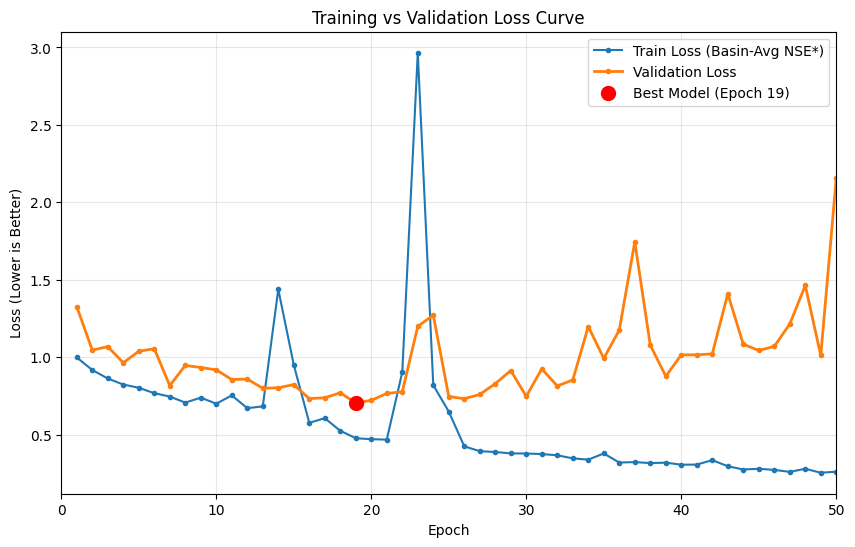

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from src.config import OUTPUT_DATA_DIR, PROCESSED_DATA_DIR

# --- 1. Parse the Log File ---
log_path = OUTPUT_DATA_DIR / "training_log.txt"

data = []
# Regex to find: "Epoch X/Y", "Train Loss ... : <val>", "Val Loss: <val>"
pattern = re.compile(r"Epoch (\d+)/\d+ \| Train Loss \(NSE\*\): ([\d\.]+) \| Val Loss: ([\d\.]+)")

with open(log_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            data.append({
                "epoch": int(match.group(1)),
                "train_loss": float(match.group(2)),
                "val_loss": float(match.group(3))
            })

df_logs = pd.DataFrame(data)

# --- 2. Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(df_logs["epoch"], df_logs["train_loss"], label="Train Loss (Basin-Avg NSE*)", marker='.')
plt.plot(df_logs["epoch"], df_logs["val_loss"], label="Validation Loss", marker='.', linewidth=2)

# Highlight the Minimum Validation Point (Best Model)
best_epoch = df_logs.loc[df_logs["val_loss"].idxmin()]
plt.scatter(best_epoch["epoch"], best_epoch["val_loss"], color='red', s=100, zorder=5, label=f"Best Model (Epoch {int(best_epoch['epoch'])})")

plt.xlabel("Epoch")
plt.ylabel("Loss (Lower is Better)")
plt.title("Training vs Validation Loss Curve")
plt.grid(True, alpha=0.3)
plt.xlim(0,50)
plt.legend()

plt.show()